#### Encode inputs into the amplitude of a vector using rotation encoding.

In [69]:
from qiskit import *
from qiskit.quantum_info import *
from qiskit.circuit.library import *

import math 
import numpy as np
from random import randrange

In [70]:
def beta_j_s(j, s, alpha):
    num = math.sqrt(sum([alpha[(((2*j)-1)*(2**(s-1)))+l]**1 for l in range(1,2**(s-1)+1)]))
    den = math.sqrt(sum([alpha[((j-1)*(2**s))+l]**1 for l in range(1,2**s+1)]))
    return (2*math.asin(num/den) if num else 0)

alpha = [0]+[randrange(1,1000) for _ in range(16)]
# alpha = [0] + [0.2,0.5,0.2,0.1]
# alpha = [0 ,963, 383, 863, 351, 648, 784, 182, 39, 77, 654]


alpha = np.round(alpha/np.linalg.norm(alpha,1.0), 20)

num_qubits = int(np.ceil(np.log2(len(alpha)-1)))
total_len = 2**num_qubits
alpha = np.append(alpha, [0]*(total_len-len(alpha)+1))
[np.sqrt(i) for i in alpha[1:]]

[0.2812424355665424,
 0.14492494561485264,
 0.30888239552348723,
 0.19287961841892473,
 0.2951967167041312,
 0.31283567604345197,
 0.03342444628789762,
 0.2565203765951847,
 0.12416630707726323,
 0.2578236214436662,
 0.18639935960242565,
 0.2900425465459115,
 0.32970128634749574,
 0.2460729437446717,
 0.2134982418518339,
 0.3158565961666353]

#### Calculate the rotation angles.

In [71]:
print (alpha, num_qubits)

h = {}

s = 1
for i in range(num_qubits):
    total = 2**(num_qubits-s)
    jlist = range(1, total+1)

    for j in jlist:
        h[(s,j)] = beta_j_s(j,s,alpha)
        print ((s,j), h[(s,j)])

    s += 1

QC = QuantumCircuit(num_qubits)
state = Statevector(QC)
state.draw(output="Latex")

[0.         0.07909731 0.02100324 0.09540833 0.03720255 0.0871411
 0.09786616 0.00111719 0.0658027  0.01541727 0.06647302 0.03474472
 0.08412468 0.10870294 0.06055189 0.0455815  0.09976539] 4
(1, 1) 0.9516291492537636
(1, 2) 1.1163981374252172
(1, 3) 1.6287998604273812
(1, 4) 2.882453856924476
(1, 5) 2.24396330065775
(1, 6) 1.999193698896117
(1, 7) 1.2823235406820395
(1, 8) 1.9528104506773525
(2, 1) 1.7109571397264058
(2, 2) 1.0829368676402458
(2, 3) 1.7560500100007266
(2, 4) 1.494728671604906
(3, 1) 1.6104563310670634
(3, 2) 1.7935308967875894
(4, 1) 1.6015239862853783


<IPython.core.display.Latex object>

Beta  (4, 1) 0 Binary string :   1.6015239862853783
Beta  (3, 1) 1 Binary string :  0 1.6104563310670634
Beta  (3, 2) 1 Binary string :  1 1.7935308967875894
Beta  (2, 1) 2 Binary string :  00 1.7109571397264058
Beta  (2, 2) 2 Binary string :  01 1.0829368676402458
Beta  (2, 3) 2 Binary string :  10 1.7560500100007266
Beta  (2, 4) 2 Binary string :  11 1.494728671604906
Beta  (1, 1) 3 Binary string :  000 0.9516291492537636
Beta  (1, 2) 3 Binary string :  001 1.1163981374252172
Beta  (1, 3) 3 Binary string :  010 1.6287998604273812
Beta  (1, 4) 3 Binary string :  011 2.882453856924476
Beta  (1, 5) 3 Binary string :  100 2.24396330065775
Beta  (1, 6) 3 Binary string :  101 1.999193698896117
Beta  (1, 7) 3 Binary string :  110 1.2823235406820395
Beta  (1, 8) 3 Binary string :  111 1.9528104506773525


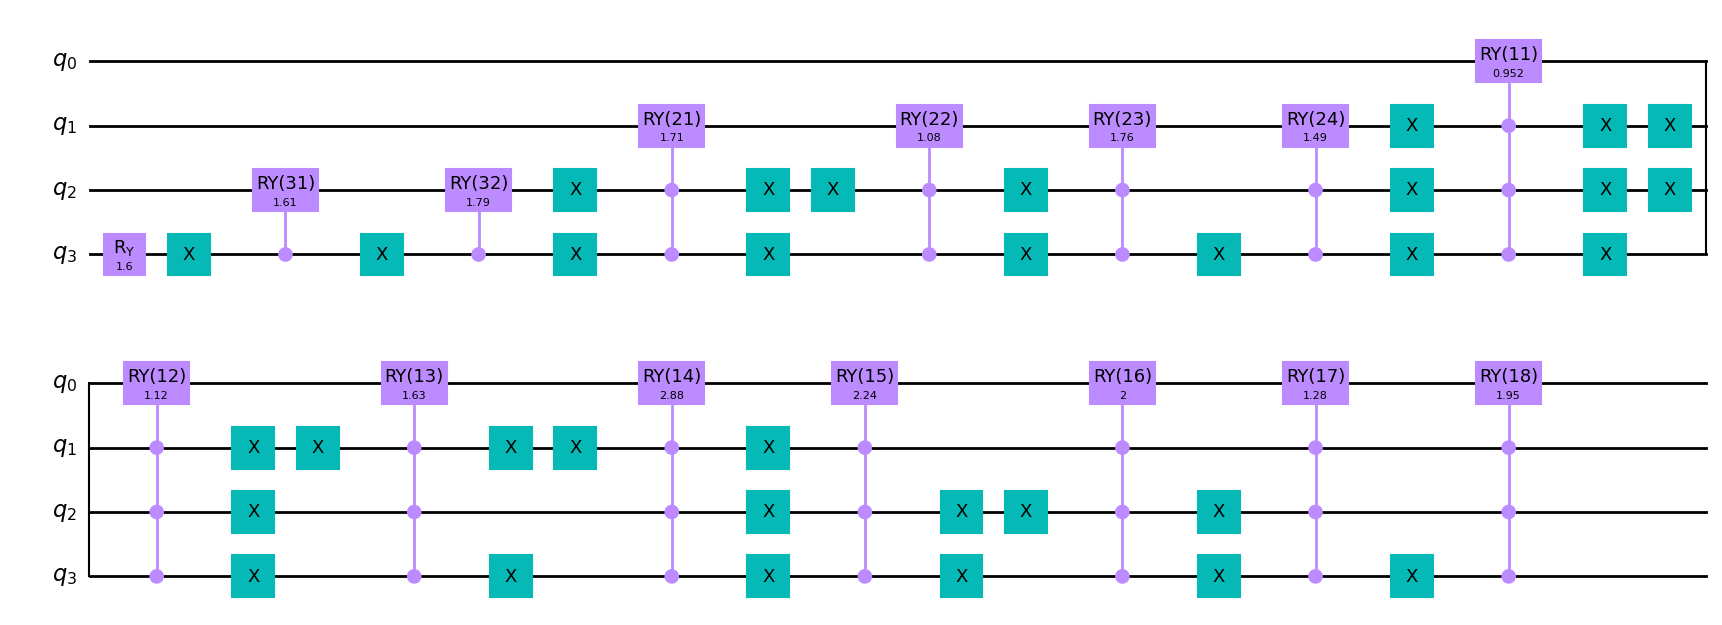

In [72]:
for wire in range(num_qubits, 0, -1):
    for j in range(1, 2**(num_qubits-wire)+1):
        bitstring = format(j-1, "#010b")[-(num_qubits-wire):] if wire != num_qubits else ""
        print ("Beta ", (wire,j),num_qubits-wire, "Binary string : ", bitstring, h[(wire,j)])
        control_wires = []
        
        if not h[(wire,j)]: 
            continue

        for i,b in zip(bitstring, range(wire, num_qubits)):
            if i == '0': 
                QC.x(b)
            control_wires.append(b)
                
        G = RYGate(h[(wire,j)], label="RY(" + str(wire) + str(j) + ")").control(len(control_wires)) if len(control_wires) else RYGate(h[(wire,j)])
        QC.append(G, control_wires + [wire-1])

        for i,b in zip(bitstring, range(wire, num_qubits)):
            if i == '0': 
                QC.x(b)

QC.draw(output='mpl', scale=1)

In [73]:
state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>